In [1]:
import numpy as np
import cv2 as cv
import functools
import operator
import itertools
import random
import matplotlib.pyplot as plt


**Genetic Algorithm**

In this project we need to optimize some random valued picture to a given image. 
to complete this task, we need some chromosomes to implement this algorithm on them, i choose some randomly numbered photos which are grey in a range of 0 to 255.
first step is to input an image resize() it and then, gray that image. which are provided using **image_to_chromosome** function

In [2]:
def image_to_chromosome(image, img_dim = 32):
    
    image = cv.resize(image, (img_dim, img_dim))
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#     plt.imshow(gray_image, cmap="gray")
    chromosome = np.array(gray_image)
    return chromosome

**Generating chromosomes**

in every GA we need a population, a group of chromosomes to the given problem, my way to generate this population is to randomly generate numbers in range of 0 to 255 for each pixel of each population member, to creat an numpy array of size, population_size which is given to the function.

In [3]:
def generate_chromosomes(pop_size = 100, img_dim = 32):
    
    population = np.random.randint( 0, 255, size = (pop_size,img_dim, img_dim))
    
    return population
            

**Fitness Calculation**

It starts with a number of bad solutions that are randomly generated. GA is based on the idea that evolving bad solutions might return better solutions. 
For every generation, the GA selects the best of the solutions in the current population and evolves them, hoping to return better solutions. GA returns best of them using fitness function.
the most challanging part of this project was this part for me, as i said i tried lots of different fitness functions for this project, i have wrote 3 of them here:

a moung these three number 2 and 3 had better results and number 1 was'nt look like how i expected and that is because i did'nt consider the fact that its mean might become great but still i dont get complete right pixels as an output.

In [4]:
def cal_fitness_func1(target_chromosome, current_chromosome): #in this project how much your fitness function reterned value bigger the better
    
    fitness = np.mean(np.abs(target_chromosome - current_chromosome))
    fitness = np.mean(target_chromosome) - fitness #np.divide(np.sum(target_chromosome),1024) - fitness
#     BEST_VALUE = (np.divide(np.sum(target_chromosome),1024))
# #     print(BEST_VALUE)

    return fitness

In [5]:
def cal_fitness_func2(target_chromosome, current_chromosome): #in this project how much your fitness function reterned value bigger the better
    
    fitness = np.mean(np.abs(target_chromosome - current_chromosome))
    fitness = np.sum(target_chromosome) - fitness #np.divide(np.sum(target_chromosome),1024) - fitness

    return fitness

In [6]:
def cal_fitness_func3(target_chromosome, current_chromosome): #in this project how much your fitness function reterned value smaller the better
    
    fitness = np.sum(np.abs(target_chromosome - current_chromosome))
    
    return fitness

Best of these three was **cal_fitness_func3** but i tried it for all of them and the results are at the end of note book.

In [7]:
def cal_population_fitness_func(target_chromosome, current_chromosome, pop_size = 100):
#     population_fitness = current_chromosome
    population_fitness = []
    for iterator in range(pop_size):
        population_fitness.append(cal_fitness_func3(target_chromosome, current_chromosome[iterator,:,:]))    #fitness function3
#         population_fitness.append(cal_fitness_func2(target_chromosome, current_chromosome[iterator,:,:]))  #fitness function2
#         population_fitness.append(cal_fitness_func1(target_chromosome, current_chromosome[iterator,:,:]))  #fitness function1

    return population_fitness

This step calculates the fittnes value for all solutions.

**Parent Selection**

The best of last parts solutions are called parents. When we say "best solutions" we are refering to the solutions with the highest fitness values.

first step is to decide how many parents to select.

It loops through the parents to select the ones with the highest fitness values and return them into an array named parents.

In order to avoid selecting this parent again in the next iteration of the loop, it is sorted and stored in a new list and then parent will be chose from this list. This guarantees not selecting it again. Then the next solution with the second maximum fitness value is selected, and the process repeats until returning all parents required:

In [8]:
def select_parents(population, fitness, pop_size, cho_size, img_dim = 32):
    sorted_population = np.sort(fitness)
    parents = []
    for iterator in range(cho_size):
#         print(sorted_population[iterator])
#         print(fitness.index(sorted_population[iterator]))

#         parents.append(population[(fitness.index(sorted_population[cho_size - 1 - iterator]))])    #for fitness_func1 ,2
        parents.append(population[(fitness.index(sorted_population[iterator]))])    #for fitness_func3
    return parents


After selecting the parents, our next step is to mate them for creating the new generation. Mating is applied using 2 operations: crossover and mutation.

**Crossover**

The crossover operation selects a number of genes from each parent and places them into their offspring.

Single-point crossover works by selecting a point at the chromosome. Genes before this point are selected from one parent, and genes after it is selected from the other parent. As a result, the offspring shares genes from both parents.
The crossover operation is applied in the project using a function named crossover().
The function goes through the parents, selecting 2 of them for mating and producing an offspring. Then it moves to another 2 parents and repeats the process:

in crossover function I changed 2D arrays to 1D in iorder to work with them easier and then at the end changed them back to their original dimention.
alsom in my function i get a sorted numpy array as input and then choose each 2 best parents to crossover them to generate a better offspring.

In [22]:
def crossover(parents,cho_size,num_of_points): 

    offsprings = []
#     random.shuffle(parents)
    for i in range(0, cho_size, 2):
        parent1 = np.array(parents[i])
        parent2 = np.array(parents[i+1])

        parent1 = parent1.reshape(-1)
        parent2 = parent2.reshape(-1)

#         num_of_points = np.random.randint(1,1023)
        gen_range = np.linspace(0,1023,1024,dtype = int)
        choose_gens = np.random.choice(gen_range, size = num_of_points)
        
        other_gens = []
        for i in np.ndarray.tolist(gen_range):
            if i not in np.ndarray.tolist(choose_gens):
                other_gens.append(i)
                
        offspring1 = np.zeros((1024),dtype = int)
        offspring2 = np.zeros((1024),dtype = int)
        
        offspring1[choose_gens] = parent1[choose_gens]
        offspring1[other_gens] = parent2[other_gens]
        offspring2[choose_gens] = parent2[choose_gens]
        offspring2[other_gens] = parent1[other_gens]
        
        offspring1 = np.reshape(offspring1,(32,32))
        offspring2 = np.reshape(offspring2,(32,32))
        
        offsprings.append(offspring1)
        offsprings.append(offspring2)

    return offsprings

If the offspring takes its genes from 2 parents where each parent has a bad gene, then the offspring will now have 2 bad genes.

There is an operation called mutation that’s applied after crossover in order to introduce modifications to the offspring.

These modifications might solve a problem in the parents by replacing a bad gene with a better one.

**Mutation**

The mutation operation selects some genes within the chromosome and then randomly changes their values.
I choose them randomly in range of 0 to 255 for one selection of each chromosome.

In [17]:
def mutation(children, cho_size):
    
    mutated_children = []
    for i in range(cho_size):
        child = np.array(children[i])
        child = child.reshape(-1)
        gen_index = np.random.randint(0, 1023)
#         print(gen_index)
        mutated_gen = np.random.randint(0, 255)#child[gen_index]
        child[gen_index] = mutated_gen
#         print(child[gen_index])
#         print(mutated_gen)
        child = np.reshape(child,(32,32))
        mutated_children.append(child)
        
    
    return mutated_children

**Choose best chromosome**

At the end of the iteration of for example 1000 times of reproducing population the best chromosome with the best fitness function value will be seprated using this function:

In [18]:
def best_chromosome(population, cho_size, target_chromosome):
    population = np.asarray(population)
    fitness_func_values = cal_population_fitness_func(target_chromosome, population, cho_size)
    sorted_pop = np.sort(fitness_func_values)
    population = np.ndarray.tolist(population)
#     best_chrom =  population[fitness_func_values.index(sorted_pop[cho_size-1])] #for fitness_func1 ,2
    best_chrom =  population[fitness_func_values.index(sorted_pop[0])]    #for fitness_func3
    return best_chrom

The image turned to grey and resized to 32 * 32:

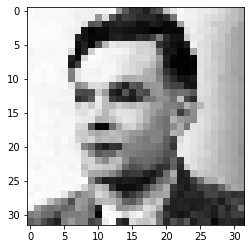

In [19]:
my_image = cv.imread('turing.jpg')   
target_image = image_to_chromosome(my_image)
plt.imshow(target_image, cmap="gray")

[86229, 89027, 86157, 88050, 89081]
[80188, 82761, 83192, 84235, 84031]
[80122, 82155, 83412, 82325, 85473]
[81924, 79886, 84002, 80504, 83792]
[79659, 80241, 81276, 80231, 83624]
[78628, 81232, 79909, 80764, 80978]
[80202, 78322, 81870, 79097, 81728]
[78691, 78627, 80069, 79790, 80886]
[78748, 78733, 80009, 79556, 80236]
[78462, 78930, 80116, 79553, 79761]
[79194, 78217, 80704, 77626, 77776]
[77161, 78594, 77437, 80017, 79575]
[79898, 74786, 80024, 78000, 81303]
[75180, 77692, 80288, 76904, 78798]
[73975, 77932, 80686, 75694, 79892]
[74939, 74937, 80716, 75541, 80207]
[71716, 78220, 77141, 75182, 80216]
[74435, 72354, 79684, 75399, 80437]
[75178, 71753, 75085, 77379, 80021]
[74522, 72113, 76910, 75817, 78869]
[73266, 73555, 78129, 74612, 76182]
[72637, 74143, 74555, 76324, 78436]
[73224, 73641, 77928, 72844, 77553]
[70099, 75851, 75031, 75598, 75945]
[75790, 69363, 74200, 77411, 78019]
[73241, 70416, 75762, 73649, 76240]
[70613, 73009, 73278, 75592, 75407]
[72153, 71586, 75566, 73324,

[54953, 57726, 59373, 57507, 61000]
[56696, 55709, 59235, 57842, 60395]
[57472, 54930, 59205, 57810, 58672]
[56280, 56194, 59352, 57128, 61778]
[56560, 55914, 61311, 54722, 61555]
[56344, 54312, 57362, 58549, 63242]
[56238, 54301, 57832, 58046, 59244]
[55924, 54718, 57834, 57874, 59714]
[56845, 53938, 58512, 57118, 59906]
[55799, 54885, 59376, 56329, 58990]
[55685, 54993, 58861, 56433, 60686]
[56016, 54743, 57827, 57647, 61180]
[55441, 55271, 59170, 56481, 58627]
[54466, 56253, 56737, 58585, 59941]
[54350, 56332, 56923, 58521, 58884]
[56319, 54309, 58493, 56926, 58609]
[54961, 55697, 56393, 59081, 59369]
[55596, 55163, 61544, 54071, 60576]
[55008, 54149, 57205, 57599, 63258]
[54129, 55067, 56381, 58338, 61056]
[54596, 54680, 56386, 58377, 60950]
[52456, 56950, 59358, 55584, 61372]
[54616, 53437, 57050, 58418, 62097]
[53689, 54426, 58928, 56567, 58290]
[53812, 54236, 59112, 55987, 60486]
[53219, 55008, 58066, 57049, 60513]
[55152, 53058, 56535, 58609, 60385]
[55049, 53180, 57742, 57470,

[51326, 50117, 52632, 53389, 54778]
[51208, 50493, 53671, 52422, 55839]
[50836, 51069, 53632, 52545, 55534]
[51820, 50250, 54557, 51766, 55758]
[51597, 50493, 51390, 54927, 58248]
[49386, 52443, 52582, 52783, 56046]
[50181, 51754, 52210, 53137, 55505]
[51245, 50801, 53010, 52434, 55374]
[50339, 51586, 53349, 52138, 55660]
[50265, 51885, 52928, 52651, 54911]
[50737, 51412, 54853, 50601, 56052]
[51262, 50182, 53448, 52947, 55513]
[49842, 51676, 53071, 53415, 56536]
[50117, 51479, 52220, 54391, 56301]
[50036, 51669, 52027, 54813, 55560]
[51573, 50137, 53210, 53662, 55819]
[51251, 50428, 51762, 55170, 54100]
[52219, 49531, 54433, 51582, 53986]
[50042, 51047, 54425, 51947, 54666]
[51798, 49488, 54512, 51957, 55973]
[51949, 49357, 53995, 52633, 55321]
[49554, 51676, 54846, 51840, 55912]
[51382, 50091, 53186, 53612, 58028]
[52287, 48973, 53493, 53378, 56139]
[50073, 51429, 51111, 55778, 57446]
[50255, 50964, 52154, 52502, 53860]
[50221, 51062, 53149, 51488, 55162]
[49552, 51989, 55059, 49815,

[49091, 49134, 51723, 51043, 55005]
[48079, 50106, 52153, 50865, 55099]
[50976, 47397, 53361, 49654, 53607]
[50148, 46936, 52373, 52042, 56185]
[49865, 47276, 51577, 51689, 53255]
[48993, 48157, 51399, 51855, 52447]
[49730, 47628, 51041, 52284, 54185]
[49023, 48458, 53327, 50019, 53429]
[48746, 48583, 53577, 49828, 52626]
[48207, 49155, 51478, 51034, 54742]
[49611, 47920, 50430, 52097, 54740]
[49454, 48127, 50892, 51846, 53287]
[49910, 47841, 52087, 50901, 54838]
[49287, 48498, 52742, 50270, 54676]
[49848, 48175, 52809, 50228, 54013]
[49584, 48650, 53266, 49928, 53561]
[49929, 48281, 53886, 49250, 53827]
[47963, 49720, 52906, 50144, 52499]
[48558, 49037, 51100, 51550, 53209]
[49748, 47960, 52596, 50160, 53744]
[49053, 48664, 52907, 49913, 51756]
[48921, 48909, 51511, 50217, 54762]
[48852, 49077, 52947, 48979, 54149]
[49067, 48737, 51120, 51097, 53300]
[50805, 47077, 51995, 50246, 52715]
[47528, 49776, 50983, 51777, 54146]
[50128, 47280, 51737, 51104, 53270]
[49922, 47793, 50501, 52379,

[47373, 50146, 51533, 50727, 51785]
[47114, 50435, 52838, 49356, 56407]
[49388, 47412, 51172, 49713, 54019]
[47859, 48969, 52170, 48529, 52396]
[46451, 50115, 51310, 49862, 54421]
[49045, 47299, 52822, 48601, 54630]
[48026, 48046, 50151, 51871, 54564]
[48866, 47330, 49523, 52809, 52252]
[48473, 47907, 52647, 49309, 52773]
[48303, 48174, 50825, 51418, 54523]
[47129, 49375, 50718, 51711, 53796]
[47955, 48621, 48927, 53743, 54196]
[47543, 49029, 49940, 51837, 52488]
[48723, 47934, 51813, 50096, 52118]
[48915, 47788, 50276, 51739, 52811]
[47862, 48628, 50620, 51472, 55851]
[48286, 48200, 51685, 50581, 52386]
[47121, 49335, 51121, 51297, 54602]
[47418, 49173, 51792, 50651, 52585]
[46804, 49944, 49935, 52513, 52301]
[46964, 49890, 51610, 50860, 53944]
[49086, 47902, 50427, 52048, 54675]
[48781, 48410, 51558, 50809, 53870]
[47344, 49907, 52054, 50319, 52557]
[49939, 47454, 50657, 51855, 53251]
[47670, 49807, 51437, 51206, 54105]
[48210, 49430, 51899, 50424, 53423]
[48695, 48928, 51076, 51325,

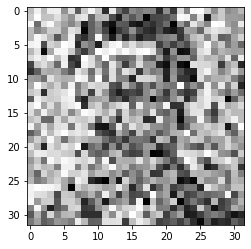

In [23]:
plot_fitness_values = []
IMG_DIM = 32
POP_SIZE = 100
CHO_SIZE = 100

target_image = image_to_chromosome(my_image)
# print(new_image.shape)

population = generate_chromosomes()
# print(population.shape)
num_of_points = np.random.randint(1,1023)


for i in range(1000):
    population_fitness = cal_population_fitness_func(target_image, population)
    # print(population_fitness)
    plot_fitness_values.append(population_fitness[:1])
    print(population_fitness[:5])
    
    parents = select_parents(population, population_fitness, POP_SIZE, CHO_SIZE, IMG_DIM)
    # print(len(parents))
    # print(parents)

    children = crossover(parents, CHO_SIZE,num_of_points)
    # print(children)

    mutated_population = mutation(children, CHO_SIZE)
    # print(mutated_population)
    
    population = np.asarray(mutated_population)

output_image = best_chromosome(mutated_population, CHO_SIZE, target_image)
plt.imshow(output_image, cmap="gray")

In [32]:
print(1 - cal_fitness_func3(target_image,mutated_population[100]))

IndexError: list index out of range

The result for **cal_fitness_func1**(mean - mean):

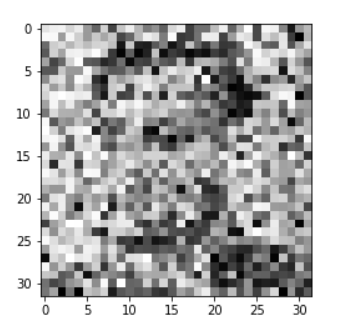

The result for **cal_fitness_func2**(mean - sum):

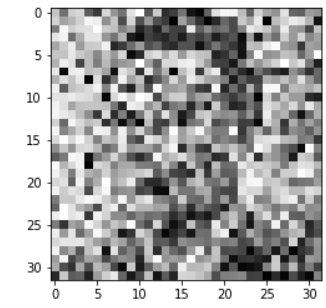

The result of **cal_fitness_func3**(sum):

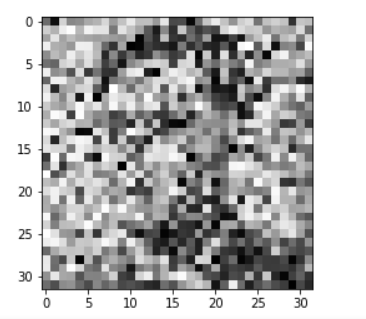

In [ ]:
plt.plot(plot_fitness_values)
plt.show()

fitness values:

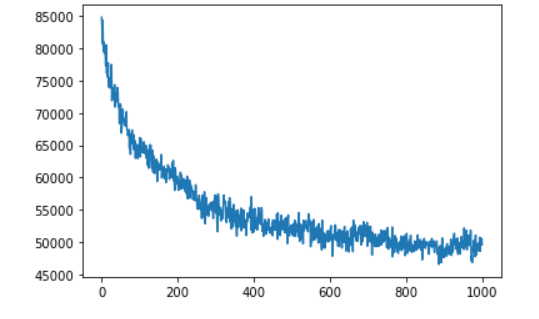

**Mazriyeh Ghayour 98242112**